In [11]:
"""
Run baselines of LSTM and CNN models
"""
import sys
from pathlib import Path

# Add the parent directory of this script to sys.path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))

# Now you can import modules from the parent directory
import torch
from helpers.simulation import *
from helpers.models import *
from helpers.training import train_single_mode, train_multi_state
from helpers.eval import *
from settings import *
import matplotlib.pyplot as plt
import os

## LSTM Evaluation

### Single-state

In [12]:
# Define model parameters
model_props= {
    "lr": 1e-4,
    "embed_dim": 64,
    "num_heads": 4,
    "hidden_dim": 128,
    "num_layers": 4,
    "dropout": 0.01,
    "batch_size": 16,
    "loss_fn": mse_loss,
    "weight_decay": 0.01,
    "model": LSTM
}

if model_props['loss_fn'] is mse_loss_coeff:
    output_size = 2
else: 
    output_size = 4

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = LSTM(model_props['embed_dim'], model_props['hidden_dim'], model_props['num_layers'], output_size, bidirectional=False, dropout=model_props['dropout'], pointwise=False)

print(f"Total params of {model.__class__.__name__}: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

# Load pretrained model
model_path = '../results_final/lstm_200000_20_64_0.0001_0.01.pt'
checkpoint = torch.load(model_path, weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()

Using device: cuda
Total params of LSTM: 809252


LSTM(
  (image_encoder): DeepResNetEmbedding(
    (initial_conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (res_block1): ResidualBlock(
      (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (skip): Sequential(
        (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (res_block2): ResidualBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), strid

In [13]:
import numpy as np

# Image parameters
N = 5000 # number of particles to simulate
nPosPerFrame = 10 
nFrames = 30
T = nFrames * nPosPerFrame

image_props = SINGLE_STATE_PROPS

#np.random.seed(1)

losses = []
for i in range(10):
    all_videos, og_labels = create_training_set(N, T, image_props)

    loss, sim = single_state_eval(all_videos, None, og_labels, model, None, model_props, image_props, device)

    losses.append(loss)

losses = np.array(losses)

print(f"Average loss: {losses.mean()}")
print(f"Std of loss: {losses.std()}")

Average loss across validation set: 0.630272467424915
Average MAE of diffusion coefficients and angle simularity across validation set: [0.36332214 0.2585199  0.8967629 ]
Average L2-based similarity of diffusion tensors across validation set: 0.9842930436134338
--------------------------------------------------
Average loss across validation set: 0.5945585824691566
Average MAE of diffusion coefficients and angle simularity across validation set: [0.36606193 0.26322907 0.9034207 ]
Average L2-based similarity of diffusion tensors across validation set: 0.9846261143684387
--------------------------------------------------
Average loss across validation set: 0.6414951560603586
Average MAE of diffusion coefficients and angle simularity across validation set: [0.36299857 0.256456   0.89474165]
Average L2-based similarity of diffusion tensors across validation set: 0.984619140625
--------------------------------------------------
Average loss across validation set: 0.6255631892924096
Average 

### Multi-state Binding

In [14]:
# Define model parameters
model_props= {
    "lr": 1e-4,
    "embed_dim": 64,
    "num_heads": 4,
    "hidden_dim": 128,
    "num_layers": 4,
    "dropout": 0.01,
    "batch_size": 16,
    "loss_fn": mse_loss,
    "weight_decay": 0.01,
    "model": LSTM
}

if model_props['loss_fn'] is mse_loss_coeff:
    output_size = 2
else: 
    output_size = 4

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = LSTM(model_props['embed_dim'], model_props['hidden_dim'], model_props['num_layers'], output_size, bidirectional=False, dropout=model_props['dropout'], pointwise=True)

print(f"Total params of {model.__class__.__name__}: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

# Load pretrained model
model_path = '../results_final/lstm_multi_state_binding_250000_20_64_0.0001_0.05.pt'
checkpoint = torch.load(model_path, weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()

Using device: cuda
Total params of LSTM: 809252


LSTM(
  (image_encoder): DeepResNetEmbedding(
    (initial_conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (res_block1): ResidualBlock(
      (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (skip): Sequential(
        (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (res_block2): ResidualBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), strid

In [15]:
import numpy as np

# Image parameters
N = 5000 # number of particles to simulate
nPosPerFrame = 10 
nFrames = 30
T = nFrames * nPosPerFrame

image_props = BINDING_IMAGE_PROPS

losses = []
for i in range(10):
    all_videos, _, og_labels = create_multi_state_dataset_w_features(N, T, image_props, binding=True)

    loss, sim = multi_state_eval(all_videos, None, og_labels, None, model, model_props, image_props, device)

    losses.append(loss)

losses = np.array(losses)

print(f"Average loss: {losses.mean()}")
print(f"Std of loss: {losses.std()}")

Creating a binding dataset
Average loss across validation set: 0.4864450491917361
Average MAE of diffusion coefficients and angle simularity across validation set: [0.37343335 0.3334411  0.9207394 ]
Average L2-based similarity of diffusion tensors across validation set: 0.9679654836654663
--------------------------------------------------
Creating a binding dataset
Average loss across validation set: 0.4900995472054573
Average MAE of diffusion coefficients and angle simularity across validation set: [0.38235512 0.3354827  0.9205194 ]
Average L2-based similarity of diffusion tensors across validation set: 0.9672842025756836
--------------------------------------------------
Creating a binding dataset
Average loss across validation set: 0.4789513280247427
Average MAE of diffusion coefficients and angle simularity across validation set: [0.3802839  0.33447728 0.9225113 ]
Average L2-based similarity of diffusion tensors across validation set: 0.9673720598220825
----------------------------

### Multi-state Isotropic

In [16]:
# Define model parameters
model_props= {
    "lr": 1e-4,
    "embed_dim": 64,
    "num_heads": 4,
    "hidden_dim": 128,
    "num_layers": 4,
    "dropout": 0.01,
    "batch_size": 16,
    "loss_fn": mse_loss_coeff,
    "weight_decay": 0.01,
    "model": LSTM
}

if model_props['loss_fn'] is mse_loss_coeff:
    output_size = 2
else: 
    output_size = 4

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = LSTM(model_props['embed_dim'], model_props['hidden_dim'], model_props['num_layers'], output_size, bidirectional=False, dropout=model_props['dropout'], pointwise=True)

print(f"Total params of {model.__class__.__name__}: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

# Load pretrained model
model_path = '../results_final/lstm_multi_state_iso_200000_15_64_0.0001_0.01.pt'
checkpoint = torch.load(model_path, weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()

Using device: cuda
Total params of LSTM: 808994


LSTM(
  (image_encoder): DeepResNetEmbedding(
    (initial_conv): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (res_block1): ResidualBlock(
      (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (skip): Sequential(
        (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (res_block2): ResidualBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), strid

In [17]:
import numpy as np

# Image parameters
N = 5000 # number of particles to simulate
nPosPerFrame = 10 
nFrames = 30
T = nFrames * nPosPerFrame

image_props = ISOTROPIC_PROPS

losses = []
for i in range(10):
    all_videos, _, og_labels = create_multi_state_dataset_w_features(N, T, image_props, binding=False)

    loss, sim = multi_state_eval_isotropic(all_videos, None, og_labels, None, model, model_props, image_props, device)

    losses.append(loss)

losses = np.array(losses)

print(f"Average loss: {losses.mean()}")
print(f"Std of loss: {losses.std()}")

Average loss across validation set: 0.016240633472468062
Average MAE of diffusion coefficients and angle simularity across validation set: [0.5551472 0.5551062]
Average L2-based similarity of diffusion tensors across validation set: 0.9698923826217651
--------------------------------------------------
Average loss across validation set: 0.016583787069721207
Average MAE of diffusion coefficients and angle simularity across validation set: [0.5594757  0.55941653]
Average L2-based similarity of diffusion tensors across validation set: 0.9693087339401245
--------------------------------------------------
Average loss across validation set: 0.016977519823155207
Average MAE of diffusion coefficients and angle simularity across validation set: [0.5658317  0.56577986]
Average L2-based similarity of diffusion tensors across validation set: 0.9686505794525146
--------------------------------------------------
Average loss across validation set: 0.016668079272624415
Average MAE of diffusion coeff

## Pix2d Evaluation

### Single-state

In [18]:
# Define model parameters
model_props= {
    "lr": 1e-4,
    "embed_dim": 64,
    "num_heads": 4,
    "hidden_dim": 128,
    "num_layers": 4,
    "dropout": 0.01,
    "batch_size": 16,
    "loss_fn": mse_loss,
    "weight_decay": 0.01,
    "model": Pix2D
}

if model_props['loss_fn'] is mse_loss_coeff:
    output_size = 2
else: 
    output_size = 4

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = Pix2D(output_dim=output_size, pointwise=False)

print(f"Total params of {model.__class__.__name__}: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

# Load pretrained model
model_path = '../results_final/pix2d_300000_30_64_0.0001_0.01.pt'
checkpoint = torch.load(model_path, weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()

Using device: cuda
Total params of Pix2D: 262244


Pix2D(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU()
    (3): Conv2d(32, 32, kernel_size=(2, 2), stride=(2, 2))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): SiLU()
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): SiLU()
    (9): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): SiLU()
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): SiLU()
    (15): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): BatchNor

In [19]:
import numpy as np

# Image parameters
N = 5000 # number of particles to simulate
nPosPerFrame = 10 
nFrames = 30
T = nFrames * nPosPerFrame

image_props = SINGLE_STATE_PROPS

#np.random.seed(1)

losses = []
for i in range(10):
    all_videos, og_labels = create_training_set(N, T, image_props)

    loss, sim = single_state_eval(all_videos, None, og_labels, model, None, model_props, image_props, device)

    losses.append(loss)

losses = np.array(losses)

print(f"Average loss: {losses.mean()}")
print(f"Std of loss: {losses.std()}")

Average loss across validation set: 0.6044826123175348
Average MAE of diffusion coefficients and angle simularity across validation set: [0.48152956 0.3597639  0.9023289 ]
Average L2-based similarity of diffusion tensors across validation set: 0.9768070578575134
--------------------------------------------------
Average loss across validation set: 0.612857870615212
Average MAE of diffusion coefficients and angle simularity across validation set: [0.47216287 0.35990354 0.9015329 ]
Average L2-based similarity of diffusion tensors across validation set: 0.9772448539733887
--------------------------------------------------
Average loss across validation set: 0.5732618806658277
Average MAE of diffusion coefficients and angle simularity across validation set: [0.47134793 0.34026152 0.9075149 ]
Average L2-based similarity of diffusion tensors across validation set: 0.9786367416381836
--------------------------------------------------
Average loss across validation set: 0.5866664751509952
Aver

### Multi-state Binding

In [21]:
# Define model parameters
model_props= {
    "lr": 1e-4,
    "embed_dim": 64,
    "num_heads": 4,
    "hidden_dim": 128,
    "num_layers": 4,
    "dropout": 0.01,
    "batch_size": 16,
    "loss_fn": mse_loss,
    "weight_decay": 0.01,
    "model": Pix2D
}

if model_props['loss_fn'] is mse_loss_coeff:
    output_size = 2
else: 
    output_size = 4

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = Pix2D(output_dim=output_size, pointwise=True)

print(f"Total params of {model.__class__.__name__}: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

# Load pretrained model
model_path = '../results_final/pix2d_multi_state_binding_100000_10_64_0.0001_0.01.pt'
checkpoint = torch.load(model_path, weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()

Using device: cuda
Total params of Pix2D: 262244


Pix2D(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU()
    (3): Conv2d(32, 32, kernel_size=(2, 2), stride=(2, 2))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): SiLU()
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): SiLU()
    (9): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): SiLU()
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): SiLU()
    (15): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): BatchNor

In [22]:
import numpy as np

# Image parameters
N = 5000 # number of particles to simulate
nPosPerFrame = 10 
nFrames = 30
T = nFrames * nPosPerFrame

image_props = BINDING_IMAGE_PROPS

losses = []
for i in range(10):
    all_videos, _, og_labels = create_multi_state_dataset_w_features(N, T, image_props, binding=True)

    loss, sim = multi_state_eval(all_videos, None, og_labels, None, model, model_props, image_props, device)

    losses.append(loss)

losses = np.array(losses)

print(f"Average loss: {losses.mean()}")
print(f"Std of loss: {losses.std()}")

Creating a binding dataset
Average loss across validation set: 0.7959560152072056
Average MAE of diffusion coefficients and angle simularity across validation set: [0.5762279  0.56649524 0.8689085 ]
Average L2-based similarity of diffusion tensors across validation set: 0.9312448501586914
--------------------------------------------------
Creating a binding dataset
Average loss across validation set: 0.796886626322558
Average MAE of diffusion coefficients and angle simularity across validation set: [0.5779614  0.55753237 0.86848015]
Average L2-based similarity of diffusion tensors across validation set: 0.9322910308837891
--------------------------------------------------
Creating a binding dataset
Average loss across validation set: 0.7954918527679079
Average MAE of diffusion coefficients and angle simularity across validation set: [0.58489484 0.568459   0.86911684]
Average L2-based similarity of diffusion tensors across validation set: 0.9309566020965576
-----------------------------

### Multi-state Isotropic

In [23]:
# Define model parameters
model_props= {
    "lr": 1e-4,
    "embed_dim": 64,
    "num_heads": 4,
    "hidden_dim": 128,
    "num_layers": 4,
    "dropout": 0.01,
    "batch_size": 16,
    "loss_fn": mse_loss_coeff,
    "weight_decay": 0.01,
    "model": Pix2D
}

if model_props['loss_fn'] is mse_loss_coeff:
    output_size = 2
else: 
    output_size = 4

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = Pix2D(output_dim=output_size, pointwise=True)

print(f"Total params of {model.__class__.__name__}: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

# Load pretrained model
model_path = '../results_final/pix2d_multi_state_iso_100000_20_64_0.0001_0.05.pt'
checkpoint = torch.load(model_path, weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])
model.to(device)
model.eval()

Using device: cuda
Total params of Pix2D: 261986


Pix2D(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): SiLU()
    (3): Conv2d(32, 32, kernel_size=(2, 2), stride=(2, 2))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): SiLU()
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): SiLU()
    (9): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): SiLU()
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): SiLU()
    (15): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (16): BatchNor

In [24]:
import numpy as np

# Image parameters
N = 5000 # number of particles to simulate
nPosPerFrame = 10 
nFrames = 30
T = nFrames * nPosPerFrame

image_props = ISOTROPIC_PROPS

losses = []
for i in range(10):
    all_videos, _, og_labels = create_multi_state_dataset_w_features(N, T, image_props, binding=False)

    loss, sim = multi_state_eval_isotropic(all_videos, None, og_labels, None, model, model_props, image_props, device)

    losses.append(loss)

losses = np.array(losses)

print(f"Average loss: {losses.mean()}")
print(f"Std of loss: {losses.std()}")

Average loss across validation set: 0.0390787363811663
Average MAE of diffusion coefficients and angle simularity across validation set: [0.95978904 0.9598093 ]
Average L2-based similarity of diffusion tensors across validation set: 0.9295110106468201
--------------------------------------------------
Average loss across validation set: 0.039366377007429766
Average MAE of diffusion coefficients and angle simularity across validation set: [0.96432817 0.96433806]
Average L2-based similarity of diffusion tensors across validation set: 0.9289829730987549
--------------------------------------------------
Average loss across validation set: 0.03924950578837258
Average MAE of diffusion coefficients and angle simularity across validation set: [0.9604167 0.9604401]
Average L2-based similarity of diffusion tensors across validation set: 0.9292497634887695
--------------------------------------------------
Average loss across validation set: 0.0397559631687061
Average MAE of diffusion coefficien

## Baseline Training

In [ ]:
# Define model parameters
model_props= {
    "lr": 1e-4,
    "embed_dim": 64,
    "num_heads": 4,
    "hidden_dim": 128,
    "num_layers": 4,
    "dropout": 0.01,
    "batch_size": 16,
    "loss_fn": mse_loss_coeff,
    "weight_decay": 0.01,
    "model": Pix2D
}

if model_props['loss_fn'] is mse_loss_coeff:
    output_size = 2
else: 
    output_size = 4

# Image parameters
N = 50000 # number of particles to simulate
nPosPerFrame = 10 
nFrames = 30
T = nFrames * nPosPerFrame
# values from Real data
background_mean,background_sigma = 1420, 290
part_mean, part_std = 6000 - background_mean,500

image_props = ISOTROPIC_PROPS

# Number of cycles of generating training data and training
cycles = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

save_results = True

Using device: cuda


Total params of Pix2D: 261986


Epochs of training:  10%|█         | 1/10 [00:10<01:36, 10.74s/it]

Epoch 1/10 | Train Loss: 0.0551 | Val Loss: 0.0404


Epochs of training:  20%|██        | 2/10 [00:21<01:25, 10.68s/it]

Epoch 2/10 | Train Loss: 0.0427 | Val Loss: 0.0412


Epochs of training:  30%|███       | 3/10 [00:31<01:14, 10.63s/it]

Epoch 3/10 | Train Loss: 0.0412 | Val Loss: 0.0402


Epochs of training:  40%|████      | 4/10 [00:42<01:03, 10.65s/it]

Epoch 4/10 | Train Loss: 0.0405 | Val Loss: 0.0403


Epochs of training:  50%|█████     | 5/10 [00:53<00:53, 10.67s/it]

Epoch 5/10 | Train Loss: 0.0400 | Val Loss: 0.0404


Epochs of training:  60%|██████    | 6/10 [01:04<00:43, 10.90s/it]

Epoch 6/10 | Train Loss: 0.0398 | Val Loss: 0.0401


Epochs of training:  70%|███████   | 7/10 [01:16<00:33, 11.15s/it]

Epoch 7/10 | Train Loss: 0.0396 | Val Loss: 0.0402


Epochs of training:  80%|████████  | 8/10 [01:28<00:22, 11.33s/it]

Epoch 8/10 | Train Loss: 0.0395 | Val Loss: 0.0403


Epochs of training:  90%|█████████ | 9/10 [01:39<00:11, 11.46s/it]

Epoch 9/10 | Train Loss: 0.0394 | Val Loss: 0.0402


Epochs of training: 100%|██████████| 10/10 [01:51<00:00, 11.16s/it]

Epoch 10/10 | Train Loss: 0.0393 | Val Loss: 0.0400


multi_state_iso_11
Average loss across validation set: 0.04003088555897877
Average MAE of diffusion coefficients and angle simularity across validation set: [0.97502124 0.97424066]
--------------------------------------------------
Saved model to path: ../results_final/pix2d_multi_state_iso_50000_10_64_0.0001_0.01.pt


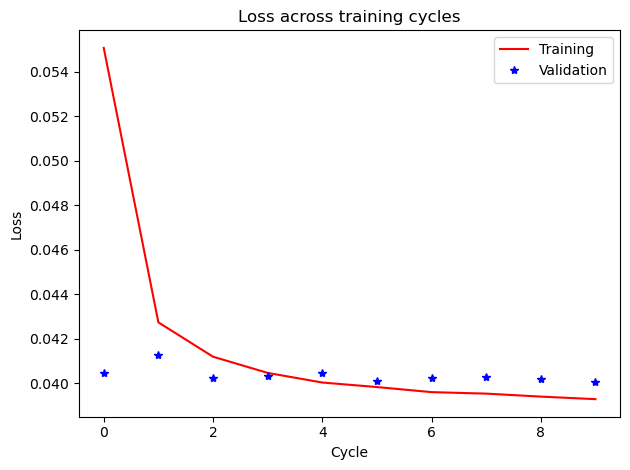

In [14]:
# Keep track of loss across training for plotting
losses = []
vlosses = []
#val_name = 'validation_data_11.npz'
val_name = 'multi_state_iso_11.npz'

# Train model
if model_props['model'] is LSTM:
    model = LSTM(model_props['embed_dim'], model_props['hidden_dim'], 
            model_props['num_layers'], output_size, bidirectional=False, dropout=model_props['dropout'], pointwise=True)
else:
    model = Pix2D(output_dim=output_size, pointwise=True)

print(f"Total params of {model.__class__.__name__}: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")
#train_single_mode(model, N, T, model_props, image_props, device, cycles, losses, vlosses, val_path='../data/'+val_name)
train_multi_state(model, N, T, model_props, image_props, device, cycles, losses, vlosses, val_path='../data/'+val_name, binding=False, is_baseline=True)

# Evaluation
model.eval()
for file in [f for f in os.listdir('../data') if f.startswith(val_name)]:
    # Get validation data
    data = np.load('../data/' + file)
    videos = torch.Tensor(data['vids'])
    #displacements = torch.Tensor(data['disp'])
    labels = torch.Tensor(data['labels'])
    
    D_max_normalization = image_props['D_max_norm']
    labels = labels / torch.Tensor([D_max_normalization, D_max_normalization, 1])

    # Create dataset and dataloader
    dataset = VideoDataset(videos, labels)
    dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

    with torch.no_grad():
        loss = []
        errors = []
        for videos, _, labels in dataloader:
            videos = videos.to(device)
            labels = labels.to(device)
            
            val_predictions = model(videos)

            val_loss = model_props['loss_fn'](val_predictions, labels)
            loss.append(val_loss.item()) # batch loss

            #angle_pred = 0.5 * torch.atan2(val_predictions[...,2], val_predictions[...,3])
            if model_props['loss_fn'] is mse_loss or mse_loss_coeff:
                mae = (val_predictions[...,:2] - labels[...,:-1]).abs().mean(axis=((0,1) if labels.dim()==3 else 0))
            else:
                mae = (torch.exp(val_predictions[...,:2]) - labels[...,:-1]).abs().mean(axis=((0,1) if labels.dim()==3 else 0))

            #angle_sim = torch.abs(torch.cos(angle_pred - labels[...,-1])).mean().unsqueeze(-1)
            # errors.append(torch.cat([
            #         mae.cpu() * D_max_normalization,
            #         angle_sim.cpu()
            #     ], axis=0))
            errors.append(
                mae.cpu() * D_max_normalization
            )

        # Compute average across all labels
        avg_loss = np.mean(loss)
        avg_error = np.mean(errors, axis=0)
        print(file[:-4])
        print(f"Average loss across validation set: {avg_loss}")
        print(f"Average MAE of diffusion coefficients and angle simularity across validation set: {avg_error}")
        print(50*'-')

if save_results:
    path = f'../results_final/pix2d_multi_state_iso_{N}_{cycles}_{model_props["embed_dim"]}_{model_props["lr"]}_{model_props["dropout"]}.pt'
    checkpoint = {
        "model_state_dict": model.state_dict()
    }
    torch.save(checkpoint, path)
    print(f"Saved model to path: {path}")
    
# Plot loss over time during training
fig, ax = plt.subplots()
ax.plot(losses, 'r', label='Training')
ax.plot(vlosses, 'b*', label='Validation')
ax.set_title('Loss across training cycles')
ax.set_ylabel('Loss')
ax.set_xlabel('Cycle')
ax.legend()
fig.tight_layout()
plt.show()

## MSD Baseline

In [2]:
import numpy as np
from helpers.helpersMSD import *

np.random.seed(1)

# Image parameters
N = 5000 # number of particles to simulate
nPosPerFrame = 10 
nFrames = 30
T = nFrames * nPosPerFrame
# values from Real data
background_mean,background_sigma = 1420, 290
part_mean, part_std = 6000 - background_mean,500

image_props = SINGLE_STATE_PROPS

# Must alter below function to return centroids
videos, displacement, labels, centroids, pos = create_training_set_w_features(N, T, image_props)

### Using Exact Position Data

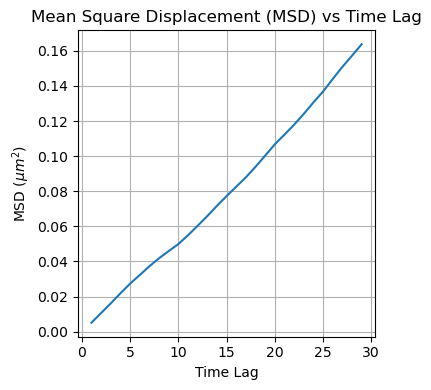

In [3]:
# Compute covariance matrices for each particle and time lags
C, taus = compute_covariance_matrix(pos)

# Estimate diffusion tensor from covariance matrix
D = estimate_diffusion_tensor(C, taus)

# Decompose tensor to get diffusion coeff and angle
vals, angles = diffusion_tensor_decomposition(D)

plotMSD(C, taus)

In [5]:
mae = np.stack([
    np.abs(vals[:,0] - labels[:,0]), 
    np.abs(vals[:,1] - labels[:,1]),
    ], axis=1).mean(axis=0)

angle_sim = np.array([np.abs(np.cos(angles - labels[:,-1])).mean()])
errors = np.concatenate((mae, angle_sim), axis=0)

print(f"Average MAE of diffusion coefficients and angle simularity across validation set: {errors}")

Average MAE of diffusion coefficients and angle simularity across validation set: [3.01910656 1.65594271 0.63318242]


### Use centroid positioning

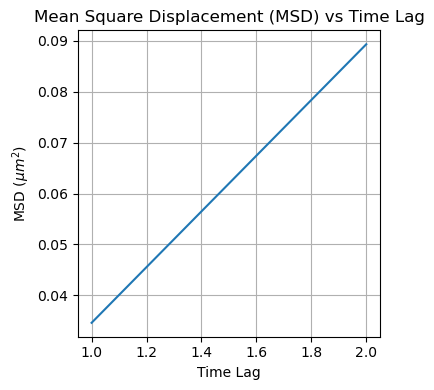

In [3]:
# Undo conversions to get back to units of simulation
centroids = centroids * image_props['resolution'] * 1e6

# Compute covariance matrices for each particle and time lags
C, taus = compute_covariance_matrix(centroids)

# Estimate diffusion tensor from covariance matrix
D = estimate_diffusion_tensor(C, taus)

# Decompose tensor to get diffusion coeff and angle
vals, angles = diffusion_tensor_decomposition(D)

plotMSD(C, taus)

In [9]:
mae = np.stack([
    np.abs(vals[:,0] - labels[:,0]), 
    np.abs(vals[:,1] - labels[:,1]),
    ], axis=1).mean(axis=0)

angle_sim = np.array([np.abs(np.cos(angles - labels[:,-1])).mean()])
errors = np.concatenate((mae, angle_sim), axis=0)

print(f"Average MAE of diffusion coefficients and angle simularity across validation set: {errors}")

Average MAE of diffusion coefficients and angle simularity across validation set: [2.98772822 1.6449397  0.63384536]


In [10]:
# Decompose to each parameter
p1_pred = vals[..., 0]
p2_pred = vals[..., 1]
sin_2theta_pred = np.sin(2 * angles)
cos_2theta_pred = np.cos(2 * angles)

# Normalize predicted sin/cos
norm = np.sqrt(sin_2theta_pred**2 + cos_2theta_pred**2 + 1e-8)
sin_2theta_pred = sin_2theta_pred / norm
cos_2theta_pred = cos_2theta_pred / norm

# Compute true values
theta = labels[..., -1]
sin_2theta_true = np.sin(2 * theta)
cos_2theta_true = np.cos(2 * theta)

# MSE on diffusion and angular parts
mse_diffusion = (p1_pred - labels[..., 0])**2 + (p2_pred - labels[..., 1])**2
mse_angle = (sin_2theta_pred - sin_2theta_true)**2 + (cos_2theta_pred - cos_2theta_true)**2

(mse_diffusion + mse_angle).mean()

np.float64(18.181576371071284)